In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(seed=0)

In [2]:
#初期値
C_m = 1.0
g_Na = 120.0
g_K = 36.0
g_L = 0.3
E_Na = 50.0
E_K = -77.0
E_L = -54.387

#時間
dt = 0.01         #時間幅
T = 300           #ms
nt = round(T/dt)  #ステップ数
time = np.arange(0.0, T, dt)

#刺激電流
I_inj = 10*(time>50) - 10*(time>100) + 35*(time>150)\
 - 35*(time>200) -10*(time>225) + 10*(time>275)

# V, m, h, n
status = np.array([-65, 0.05, 0.6, 0.32])

#statusのデータ格納
X_arr = np.zeros((nt, 4))

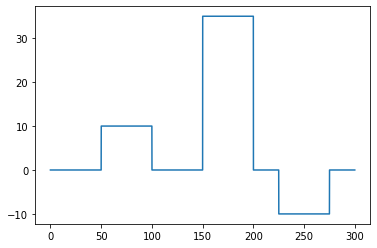

In [3]:
plt.plot(time, I_inj)

In [5]:
#4次ルンゲクッタ
def Solvers(func, x, dt):
    k1 = dt*func(x)
    k2 = dt*func(x + 0.5*k1)
    k3 = dt*func(x + 0.5*k2)
    k4 = dt*func(x + k3)
    return x + (k1 + 2*k2 + 2*k3 + k4) / 6

In [6]:
#ゲート変数を表すα, β
def alpha_m(V):
    return 0.1*(V+40.0)/(1.0 - np.exp(-(V+40.0) / 10.0))
def beta_m(V):
    return 4.0*np.exp(-(V+65.0) / 18.0)
def alpha_h(V):
    return 0.07*np.exp(-(V+65.0) / 20.0)
def beta_h(V):
    return 1.0/(1.0 + np.exp(-(V+35.0) / 10.0))
def alpha_n(V):
    return 0.01*(V+55.0)/(1.0 - np.exp(-(V+55.0) / 10.0))
def beta_n(V):
    return 0.125*np.exp(-(V+65) / 80.0)

In [7]:
#電流
def I_Na(V, m, h):
    return g_Na * m**3 * h * (V - E_Na)
def I_K(V, n):
    return g_K  * n**4 * (V - E_K)
def I_L(V):
    return g_L * (V - E_L)

In [8]:
# 微分方程式
def dALLdt(states):
    V, m, h, n = states

    dVdt = (I_m - I_Na(V, m, h) - I_K(V, n) - I_L(V)) / C_m
    dmdt = alpha_m(V)*(1.0-m) - beta_m(V)*m
    dhdt = alpha_h(V)*(1.0-h) - beta_h(V)*h
    dndt = alpha_n(V)*(1.0-n) - beta_n(V)*n
    return np.array([dVdt, dmdt, dhdt, dndt])

In [9]:
#計算
for i in range(nt):
    I_m = I_inj[i]
    status = Solvers(dALLdt, status, dt)
    X_arr[i] = status
    status = status

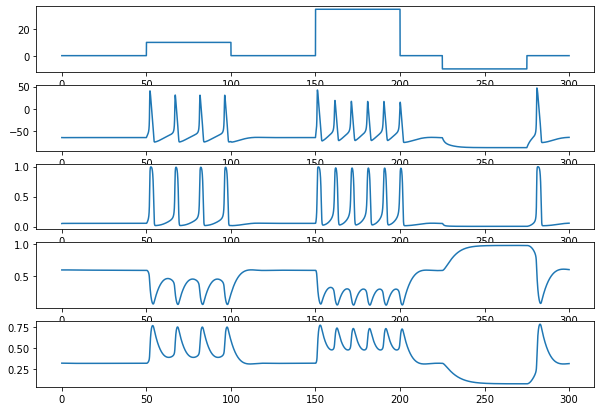

In [14]:
#描画
plt.figure(figsize=(10, 7))
plt.subplot(5,1,1)
plt.plot(time, I_inj)
plt.subplot(5,1,2)
plt.plot(time, X_arr[:,0])
plt.subplot(5,1,3)
plt.plot(time, X_arr[:,1])
plt.subplot(5,1,4)
plt.plot(time, X_arr[:,2])
plt.subplot(5,1,5)
plt.plot(time, X_arr[:,3])